## Apply the cloneAE signature to untreated profiles

**Gregory Way, 2020**

We collected many more profiles of clones (both WT and resistant clones) in the context of bortezomib resistance.

Apply the cloneAE signature to these clones.

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(singscore))

source(file.path("utils", "singscore_utils.R"))

In [2]:
set.seed(863)

In [3]:
# Load batch 3 normalized profiles
batch <- "2019_06_25_Batch3"
batch3_file <- file.path("data", paste0(batch, "_combined_normalized.csv.gz"))

profile_cols <- readr::cols(
    .default = readr::col_double(),
    Metadata_Plate = readr::col_character(),
    Metadata_Well = readr::col_character(),
    Metadata_batch = readr::col_character(),
    Metadata_cell_count = readr::col_integer(),
    Metadata_clone_number = readr::col_character(),
    Metadata_unique_sample_name = readr::col_character(),
    Metadata_plate_map_name = readr::col_character(),
    Metadata_treatment = readr::col_character()
)

df <- readr::read_csv(batch3_file, col_types = profile_cols)

print(dim(df))
head(df)

[1]  105 3536


Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_clone_number,Metadata_plate_map_name,Metadata_treatment,Metadata_unique_sample_name,Cells_AreaShape_Area,Cells_AreaShape_Center_X,⋯,Nuclei_Texture_Variance_RNA_10_02,Nuclei_Texture_Variance_RNA_10_03,Nuclei_Texture_Variance_RNA_20_00,Nuclei_Texture_Variance_RNA_20_01,Nuclei_Texture_Variance_RNA_20_02,Nuclei_Texture_Variance_RNA_20_03,Nuclei_Texture_Variance_RNA_5_00,Nuclei_Texture_Variance_RNA_5_01,Nuclei_Texture_Variance_RNA_5_02,Nuclei_Texture_Variance_RNA_5_03
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MutClones,B02,2019_06_25_Batch3,9203,BZ001,MutClones,Untreated,profile_0_2019_06_25_Batch3,15.425583,-2.7840891,⋯,50.276671,50.855203,71.997618,74.472724,68.817937,75.172657,51.122659,50.427995,51.060463,50.201707
MutClones,B03,2019_06_25_Batch3,27543,BZ002,MutClones,Untreated,profile_1_2019_06_25_Batch3,6.010408,-2.0640661,⋯,2.114785,2.169167,2.830288,1.589384,2.696348,1.636899,1.941830,2.036691,1.997141,1.995680
MutClones,B04,2019_06_25_Batch3,8086,BZ003,MutClones,Untreated,profile_2_2019_06_25_Batch3,21.898516,-1.4160453,⋯,32.036498,32.740388,45.768109,46.116913,43.245857,43.918108,32.673329,31.912389,32.865138,32.135791
MutClones,B05,2019_06_25_Batch3,19640,BZ004,MutClones,Untreated,profile_3_2019_06_25_Batch3,8.945385,-0.4800154,⋯,12.776121,13.095502,17.857581,16.673501,16.587133,16.339759,12.866158,12.795313,12.919991,12.728179
MutClones,B06,2019_06_25_Batch3,20440,BZ005,MutClones,Untreated,profile_4_2019_06_25_Batch3,9.395802,-0.2640084,⋯,8.155104,8.489150,12.062067,11.939301,11.497942,11.877239,8.368398,8.280239,8.324269,8.136390
MutClones,B07,2019_06_25_Batch3,31643,BZ006,MutClones,Untreated,profile_5_2019_06_25_Batch3,2.131007,-0.5520177,⋯,3.518346,3.455252,3.191994,3.362872,3.125115,3.448570,3.599679,3.544529,3.564709,3.541336


In [4]:
# Load signature
sig_dir <- file.path("results", "signatures")
signature_file <- file.path(sig_dir, "signature_summary_full_bulk_signature.tsv")

sig_col_types <- readr::cols(
    features = readr::col_character(),
    plate_exclude = readr::col_logical(),
    batch_exclude = readr::col_logical(),
    non_specific_exclude = readr::col_logical(),
    final_signature = readr::col_logical(),
    dataset = readr::col_character()
)

signature_df <- readr::read_tsv(signature_file, col_types = sig_col_types) %>%
    dplyr::filter(dataset == "cloneAE", final_signature)

print(dim(signature_df))
head(signature_df, 4)

[1] 18  8


features,non_status_significant_exclude,cell_count_exclude,plate_exclude,batch_exclude,non_specific_exclude,final_signature,dataset
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
Cells_Correlation_Manders_ER_DNA,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,cloneAE
Cytoplasm_Correlation_RWC_Mito_AGP,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,cloneAE
Cytoplasm_Granularity_2_Mito,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,cloneAE
Nuclei_AreaShape_Area,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,cloneAE


In [5]:
# Load Tukey results (to determine if feature is "up" or "down")
tukey_file <- file.path(sig_dir, "tukey_results_full_bulk_signature.tsv.gz")

tukey_cols <- readr::cols(
    term = readr::col_character(),
    comparison = readr::col_character(),
    estimate = readr::col_double(),
    conf.low = readr::col_double(),
    conf.high = readr::col_double(),
    adj.p.value = readr::col_double(),
    feature = readr::col_character(),
    neg_log_adj_p = readr::col_double(),
    dataset = readr::col_character()
)

tukey_df <- readr::read_tsv(tukey_file, col_types = tukey_cols) %>%
    dplyr::filter(dataset == "cloneAE")

print(dim(tukey_df))
head(tukey_df, 4)

[1] 2667    9


term,comparison,estimate,conf.low,conf.high,adj.p.value,feature,neg_log_adj_p,dataset
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
Metadata_clone_type_indicator,1-0,-0.07805113,-0.07805113,-0.07805113,0,Cytoplasm_Correlation_Costes_RNA_Mito,Inf,cloneAE
Metadata_batch,2019_03_20_Batch2-2019_02_15_Batch1_20X,0.36668143,0.36668143,0.36668143,0,Cytoplasm_Correlation_Costes_RNA_Mito,Inf,cloneAE
Metadata_batch,2020_07_02_Batch8-2019_02_15_Batch1_20X,-0.15710637,-0.15710637,-0.15710637,0,Cytoplasm_Correlation_Costes_RNA_Mito,Inf,cloneAE
Metadata_batch,2020_07_02_Batch8-2019_03_20_Batch2,-0.52378780,-0.52378780,-0.52378780,0,Cytoplasm_Correlation_Costes_RNA_Mito,Inf,cloneAE


## Compile signature

In [6]:
tukey_subset_df <- tukey_df %>%
    dplyr::filter(
        term == "Metadata_clone_type_indicator",
        feature %in% signature_df$features
)

# Determine feature direction
up_features <- tukey_subset_df %>% dplyr::filter(estimate > 0) %>% dplyr::pull(feature)
down_features <- tukey_subset_df %>% dplyr::filter(estimate < 0) %>% dplyr::pull(feature)
    
# Store signature for downstream analyses
cloneAE_signature <- list("up" = up_features, "down" = down_features)

cloneAE_signature

$up
 [1] "Cytoplasm_Granularity_2_Mito"                   
 [2] "Nuclei_RadialDistribution_MeanFrac_AGP_4of4"    
 [3] "Nuclei_Texture_AngularSecondMoment_ER_20_03"    
 [4] "Nuclei_Texture_InverseDifferenceMoment_AGP_5_02"
 [5] "Nuclei_AreaShape_Zernike_8_2"                   
 [6] "Nuclei_AreaShape_FormFactor"                    
 [7] "Nuclei_RadialDistribution_MeanFrac_ER_4of4"     
 [8] "Nuclei_AreaShape_MedianRadius"                  
 [9] "Nuclei_AreaShape_Area"                          
[10] "Nuclei_AreaShape_Zernike_6_0"                   

$down
[1] "Nuclei_RadialDistribution_MeanFrac_ER_3of4" 
[2] "Nuclei_Texture_Contrast_ER_5_02"            
[3] "Nuclei_Correlation_Correlation_DNA_ER"      
[4] "Nuclei_Intensity_MassDisplacement_DNA"      
[5] "Cytoplasm_Correlation_RWC_Mito_AGP"         
[6] "Cells_Correlation_Manders_ER_DNA"           
[7] "Nuclei_RadialDistribution_RadialCV_DNA_3of4"
[8] "Nuclei_Granularity_2_ER"

## Apply signature

In [7]:
seed <- 1234

singscore_output = singscorePipeline(
    df = df,
    sig_feature_list = cloneAE_signature,
    num_permutations = 1000
)

full_results_df <- singscore_output[["results"]]

print(dim(full_results_df))
head(full_results_df)

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

[1] 105  15


Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_clone_number,Metadata_plate_map_name,Metadata_treatment,Metadata_unique_sample_name,TotalScore,TotalDispersion,UpScore,UpDispersion,DownScore,DownDispersion,Metadata_permuted_p_value
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MutClones,B02,2019_06_25_Batch3,9203,BZ001,MutClones,Untreated,profile_0_2019_06_25_Batch3,-0.25659552,1159.393,-0.14562251,670.8765,-0.11097301,488.5167,0.963
MutClones,B03,2019_06_25_Batch3,27543,BZ002,MutClones,Untreated,profile_1_2019_06_25_Batch3,0.30824712,1639.756,0.16492325,921.4359,0.14332386,718.3197,0.014
MutClones,B04,2019_06_25_Batch3,8086,BZ003,MutClones,Untreated,profile_2_2019_06_25_Batch3,-0.17539216,1488.530,-0.10270040,736.1109,-0.07269176,752.4195,0.890
MutClones,B05,2019_06_25_Batch3,19640,BZ004,MutClones,Untreated,profile_3_2019_06_25_Batch3,-0.14183194,1293.568,-0.07421831,655.3092,-0.06761364,638.2593,0.838
MutClones,B06,2019_06_25_Batch3,20440,BZ005,MutClones,Untreated,profile_4_2019_06_25_Batch3,-0.06936617,1165.324,-0.04695850,666.4287,-0.02240767,498.8949,0.649
MutClones,B07,2019_06_25_Batch3,31643,BZ006,MutClones,Untreated,profile_5_2019_06_25_Batch3,-0.06440368,1641.238,-0.10048323,1037.8200,0.03607955,603.4182,0.685


## Visualize scores

In [8]:
min_val <- quantile(as.vector(as.matrix(singscore_output[["permuted"]])), 0.05)
max_val <- quantile(as.vector(as.matrix(singscore_output[["permuted"]])), 0.95)

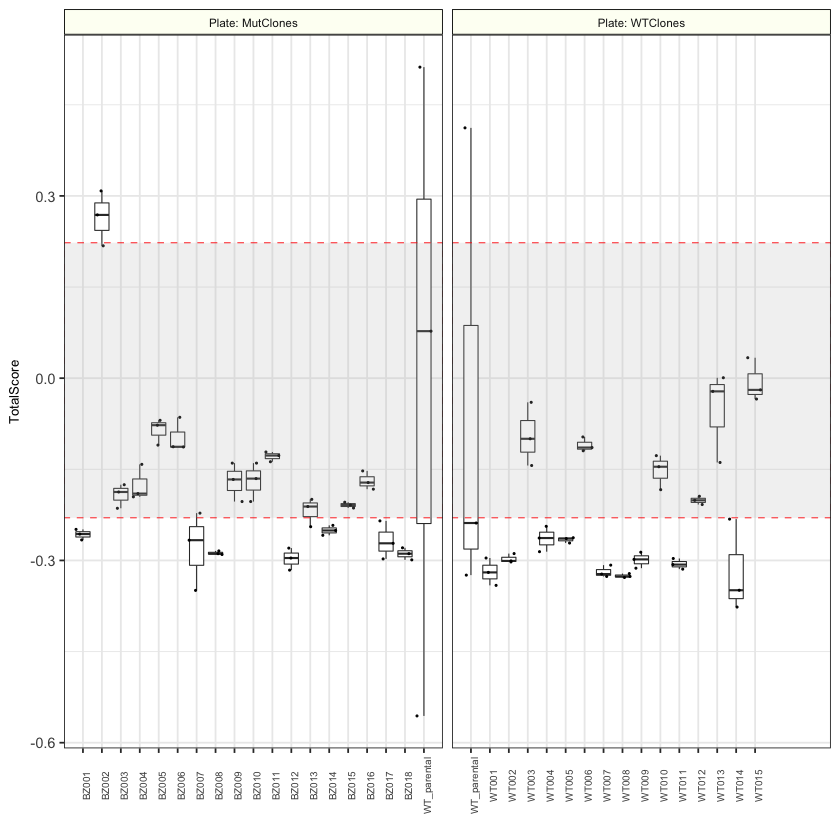

In [9]:
append_plate <- function(string) paste0("Plate: ", string)

batch3_gg <- (
    ggplot(full_results_df, aes(y = TotalScore, x = Metadata_clone_number)) +
    geom_boxplot(lwd = 0.3) +
    geom_jitter(size = 0.2) +
    facet_wrap(
        "~Metadata_Plate",
        scales = "free_x",
        labeller = labeller(Metadata_Plate = as_labeller(append_plate))
    ) +
    xlab("") +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle = 90, size = 6),
        strip.text = element_text(size = 7),
        strip.background = element_rect(colour="black", fill="#fdfff4"),
        legend.title = element_text(size = 8),
        legend.text = element_text(size = 5),
        legend.key.size = unit(0.4, "cm"),
        axis.title = element_text(size = 8),
    ) +
    annotate(
            "rect",
             ymin = min_val,
             ymax = max_val,
             xmin = 0,
             xmax = 20,
             alpha = 0.2,
             color = "red",
             linetype = "dashed",
             fill = "grey",
             lwd = 0.25
        )
)

output_fig_file <- file.path("figures", "batch3", paste0("singscore_validation_", batch, ".png"))
ggsave(output_fig_file, batch3_gg, dpi = 500, height = 2.5, width = 4)

batch3_gg